<a href="https://colab.research.google.com/github/Githubmany/Projects/blob/master/03_introduction_to_computer_vision_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Network and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.



## Get the data

The images we are working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we have modified it to only use two classes (pizza 🍕 and steak 🍖)
using the image data modification notebook: https://github.com/mrdebourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the dowloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-05-30 19:24:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.207, 108.177.120.207, 142.251.183.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   159MB/s    in 0.7s    

2024-05-30 19:24:57 (159 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with the data)

Avery crucial step at the beginning of any machine learning project is becoming one with the data.
And for a computer vision project,...this usually means visualizing many samples of your data.


In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
!ls -al pizza_steak

total 16
drwxr-xr-x 4 root root 4096 May 30 19:24 .
drwxr-xr-x 1 root root 4096 May 30 19:24 ..
drwxr-xr-x 4 root root 4096 May 30 19:24 test
drwxr-xr-x 4 root root 4096 May 30 19:24 train


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programatically


In [8]:
# Get the classnames programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  # Created a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


['234626.jpg']
Image shape: (512, 384, 3)


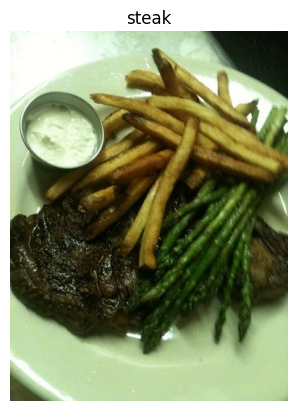

In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we will view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")  # show the shape of the image

  return img

  # View random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                          target_class="steak")  # chang "steak" to "pizza""

In [10]:
# The images we have imported are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[234, 252, 230],
        [236, 254, 232],
        [236, 255, 233],
        ...,
        [  4,  14,   6],
        [  4,  14,   6],
        [  4,  14,   6]],

       [[237, 255, 233],
        [236, 254, 232],
        [234, 253, 231],
        ...,
        [  4,  14,   6],
        [  4,  14,   6],
        [  4,  14,   6]],

       [[237, 255, 234],
        [235, 254, 232],
        [232, 251, 229],
        ...,
        [  4,  14,   6],
        [  3,  13,   5],
        [  3,  13,   5]],

       ...,

       [[ 72,  81,  50],
        [ 70,  79,  48],
        [ 69,  78,  47],
        ...,
        [157, 181, 129],
        [153, 178, 123],
        [149, 174, 117]],

       [[ 70,  80,  46],
        [ 70,  80,  46],
        [ 69,  80,  48],
        ...,
        [150, 173, 121],
        [145, 168, 114],
        [141, 164, 108]],

       [[ 64,  74,  40],
        [ 65,  75,  41],
        [ 67,  78,  46],
        ...,
        [140, 163, 11

In [11]:
# View the image shape
img.shape    # returns width, height, color channels

(512, 384, 3)

> 🔑 **Note:** Many machine learning model, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize** their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [12]:
# Get all the pixel values between 0 and 1 (scale/normalize the data, as neural networks love values between 0 and 1)
img/255

array([[[0.91764706, 0.98823529, 0.90196078],
        [0.9254902 , 0.99607843, 0.90980392],
        [0.9254902 , 1.        , 0.91372549],
        ...,
        [0.01568627, 0.05490196, 0.02352941],
        [0.01568627, 0.05490196, 0.02352941],
        [0.01568627, 0.05490196, 0.02352941]],

       [[0.92941176, 1.        , 0.91372549],
        [0.9254902 , 0.99607843, 0.90980392],
        [0.91764706, 0.99215686, 0.90588235],
        ...,
        [0.01568627, 0.05490196, 0.02352941],
        [0.01568627, 0.05490196, 0.02352941],
        [0.01568627, 0.05490196, 0.02352941]],

       [[0.92941176, 1.        , 0.91764706],
        [0.92156863, 0.99607843, 0.90980392],
        [0.90980392, 0.98431373, 0.89803922],
        ...,
        [0.01568627, 0.05490196, 0.02352941],
        [0.01176471, 0.05098039, 0.01960784],
        [0.01176471, 0.05098039, 0.01960784]],

       ...,

       [[0.28235294, 0.31764706, 0.19607843],
        [0.2745098 , 0.30980392, 0.18823529],
        [0.27058824, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between o and 1, also called scalling or normalization
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup pathpaths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode = "binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                    kernel_size=3,
                    activation="relu",
                    input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                          padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 115s 2s/step - loss: 0.5760 - accuracy: 0.6753 - val_loss: 0.4481 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 115s 2s/step - loss: 0.4656 - accuracy: 0.7927 - val_loss: 0.3854 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 116s 2s/step - loss: 0.4187 - accuracy: 0.8227 - val_loss: 0.3660 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 119s 3s/step - loss: 0.3887 - accuracy: 0.8353 - val_loss: 0.3362 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 117s 3s/step - loss: 0.3475 - accuracy: 0.8513 - val_loss: 0.3770 - val_accuracy: 0.8640


> 🔑 **Note:** If the above cell is taking longer than ~ 10 seconds per epoch, make sure you are using a GPU by doing to Runtime -> Change Runtime Type->
Hardware Accelerator-> GPU (you may have to rerun some ceels above).

In [14]:
len(train_data)

47

In [15]:
1500/32

46.875

In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

🛠 **Practice/Excercise:** Go through the CNN explainer website for a minimum of 10 minutes and compare our neural network with theirs:
https://poloclub.github.io/cnn-explainer/



## Using the same model as before

Let's replicate the model we have built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.30551&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).


In [17]:
train_data

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
  ])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_2.fit(train_data, epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 205ms/step - loss: 1.4037 - accuracy: 0.5093 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [19]:
# Get a summary of model_2
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 6)                 903174    
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 903223 (3.45 MB)
Trainable params: 903223 (3.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly....let's try

In [20]:
# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 28s 540ms/step - loss: 3.3688 - accuracy: 0.6247 - val_loss: 0.5796 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 26s 561ms/step - loss: 0.6904 - accuracy: 0.7213 - val_loss: 0.5562 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 26s 549ms/step - loss: 0.6373 - accuracy: 0.7453 - val_loss: 0.4859 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 25s 536ms/step - loss: 0.5737 - accuracy: 0.7567 - val_loss: 0.4484 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 27s 572ms/step - loss: 0.4971 - accuracy: 0.7927 - val_loss: 0.4072 - val_accuracy: 0.8080


In [21]:
# Get a summary of of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
15000000 /3100

4838.709677419355

> 🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we are using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a high number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often helpful in deciphiring between different **features** in an image.


In [23]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Binary Classification: Let's break it down

* 1. Become one with the data (visualize, visualize, visualize)
* 2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches.)
* 3. Create a model
* 4. Fit the model
* 5. Evaluate the model
* 6. Adjust the different parameters and improve the model (try to beat our baseline)
* 7. Repeat until satisfied (experiment, experiment, experiment)


## 1. Become one with the data

['854150.jpg']
Image shape: (382, 512, 3)
['899818.jpg']
Image shape: (384, 512, 3)


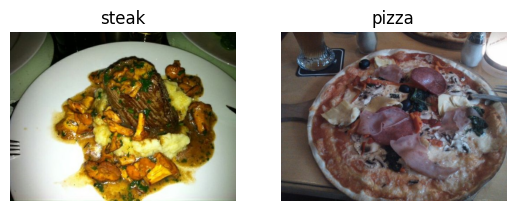

In [24]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## Preprocess the data (prepare it for a model)


In [25]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"



Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10 000 images at one time, a model might only look at 32 at a time.

It does this for a couple reasons:
* 1. 10 000 images (or more) might not fit into the memory of your processor (GPU).
* 2. Trying to learn the patterns in 10 000 images in onehit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health....Yann LeCun said so.

In [26]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [27]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,   # Target directory of images
                                              target_size=(224, 224),  # Target size of images (height, width)
                                              class_mode="binary",  # type of data you are working with
                                              batch_size=32)  # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [28]:
# Get a sample of a train data batch
images, labels = train_data.next()  #  get the "next" batch of images/labels in
len(images), len(labels)

(32, 32)

In [29]:
# How many batches are there?
len(train_data)

47

In [30]:
1500/32

46.875

In [31]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [32]:
images[7].shape

(224, 224, 3)

In [33]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite  amount of architecture you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).


In [34]:
# Make the create of our model a litttle easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [35]:
# Create the model (this will be our baseline, a layer conolutional neutral network)
model_4 = Sequential([
    Conv2D(filters=10,  # filters is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=(3, 3),  # the size of the sliding window going across an input
           strides=1,  # the size of the step the sliding window takes across an input
           padding="valid",  # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)),  # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")  # output layer (working with binary classification so only 1 output neuron)
])




> 🛠 **Practice:** Understand what is going on in a Conv2D layer by going through the CNN explainer website for 10-20 minutes:
https:// poloclub.github.io/cnn-explainer/

In [36]:
# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [37]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 4. Fit the model

In [38]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [39]:
# Fit the model
history_4 = model_4.fit(train_data,  # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 146s 3s/step - loss: 0.8517 - accuracy: 0.5527 - val_loss: 0.6435 - val_accuracy: 0.6120
Epoch 2/5
47/47 [==============================] - 137s 3s/step - loss: 0.5469 - accuracy: 0.7180 - val_loss: 0.4476 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 136s 3s/step - loss: 0.4017 - accuracy: 0.8287 - val_loss: 0.4920 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 143s 3s/step - loss: 0.2879 - accuracy: 0.8940 - val_loss: 0.4672 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 138s 3s/step - loss: 0.1428 - accuracy: 0.9607 - val_loss: 0.5187 - val_accuracy: 0.7700


## 5. Evaluating the model

It looks like our model is learning, something, let's evaluate it.

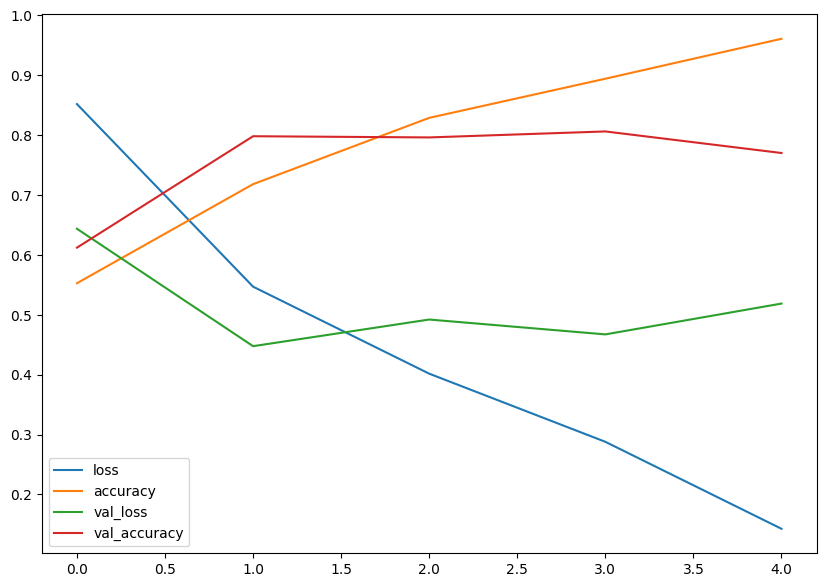

In [40]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [41]:
# PLot the validation and training cutves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))  #  how many epochs did we run for?

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend();

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be deminished.

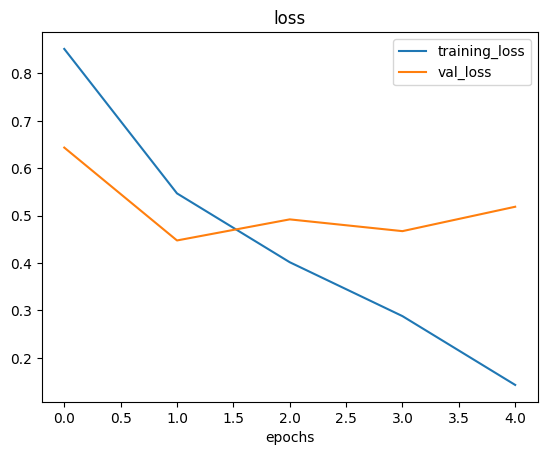

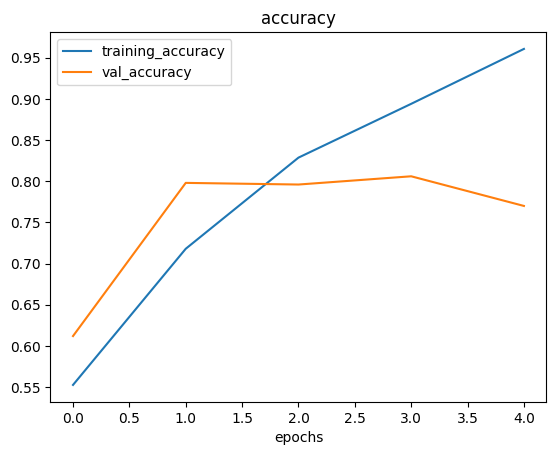

In [42]:
# Check out the accuracy and loss of model_4
plot_loss_curves(history_4)

## 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

* 0. Create a baseline
* 1. Beat the baseline by overfitting a larger model
* 2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of filters
* Add another dense layer to the output of our flattened layers

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [43]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [44]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [45]:
# Fit the model
history_5 = model_5.fit(train_data,
                  epochs=5,
                  steps_per_epoch=len(train_data),
                  validation_data=test_data,
                  validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 62s 1s/step - loss: 0.6259 - accuracy: 0.6587 - val_loss: 0.4785 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 56s 1s/step - loss: 0.4950 - accuracy: 0.7687 - val_loss: 0.4000 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 59s 1s/step - loss: 0.4568 - accuracy: 0.8067 - val_loss: 0.3836 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 57s 1s/step - loss: 0.4423 - accuracy: 0.7980 - val_loss: 0.4316 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 56s 1s/step - loss: 0.4140 - accuracy: 0.8273 - val_loss: 0.3900 - val_accuracy: 0.8360


In [46]:
# Get a summary of our model with max pooling
model_5.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [47]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


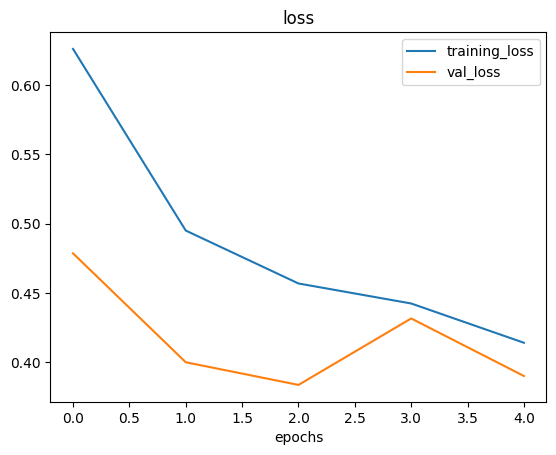

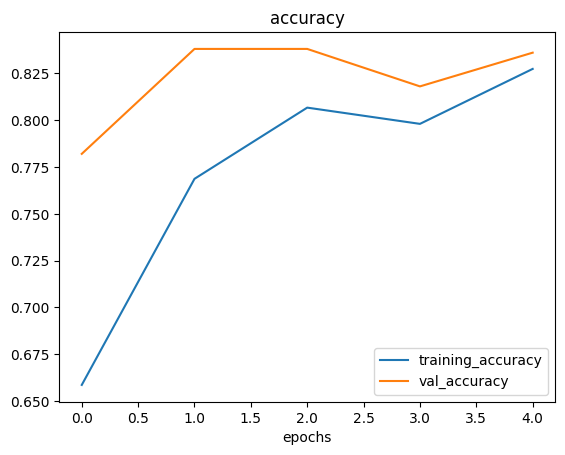

In [48]:
# Plot loss curves
plot_loss_curves(history_5)

## Opening our bag of tricks and finding data augmentation


In [49]:
# Create ImageDataGenerator training in instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,  # how much do you want to rotate an image?
                                             shear_range=0.2,  # how much do you want to shear an image?
                                             zoom_range=0.2,  # zoom in randomly on an image
                                             width_shift_range=0.2,  # move your image around on the x-axis
                                             height_shift_range=0.2,  # move your image around on the y-axis
                                             horizontal_flip=True)  # Do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)



> 🤔 **Question:** What is data augmentation?

Data augmentation is a process of altering our training data, leading to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering may mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation....

In [50]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)  # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_datagen.flow_from_directory(train_dir,
                                  target_size=(224, 224),
                                  batch_size=32,
                                  class_mode="binary",
                                  shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data =test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded into the model.

Finally...let's visualize some augmented data!!!!

In [51]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()  # note: labels aren't augmented.... only data (images)

showing image number: 28


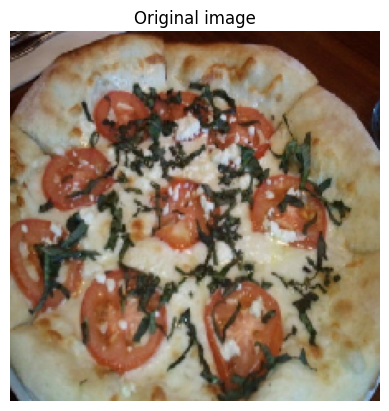

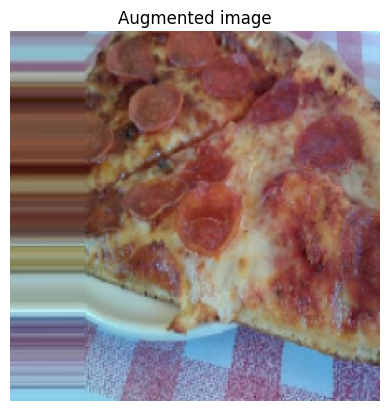

In [52]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32)  # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we have seen what augmented training data looks like, let's build a model and see how it learns on augmented data.


In [53]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [54]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,  # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 77s 2s/step - loss: 0.9159 - accuracy: 0.5167 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 78s 2s/step - loss: 0.6914 - accuracy: 0.5393 - val_loss: 0.6912 - val_accuracy: 0.5780
Epoch 3/5
47/47 [==============================] - 72s 2s/step - loss: 0.6895 - accuracy: 0.5833 - val_loss: 0.6791 - val_accuracy: 0.5060
Epoch 4/5
47/47 [==============================] - 74s 2s/step - loss: 0.6822 - accuracy: 0.5080 - val_loss: 0.6751 - val_accuracy: 0.5800
Epoch 5/5
47/47 [==============================] - 72s 2s/step - loss: 0.6801 - accuracy: 0.5600 - val_loss: 0.6575 - val_accuracy: 0.5680


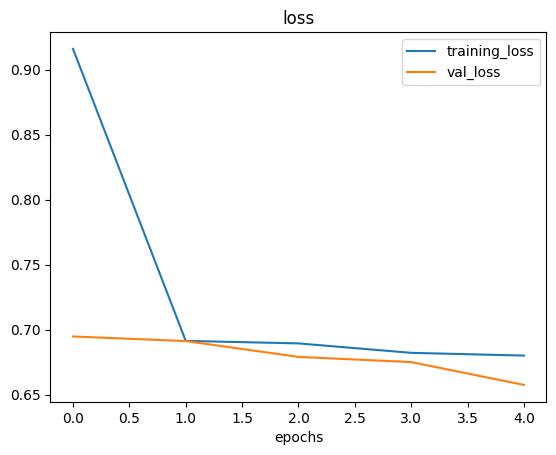

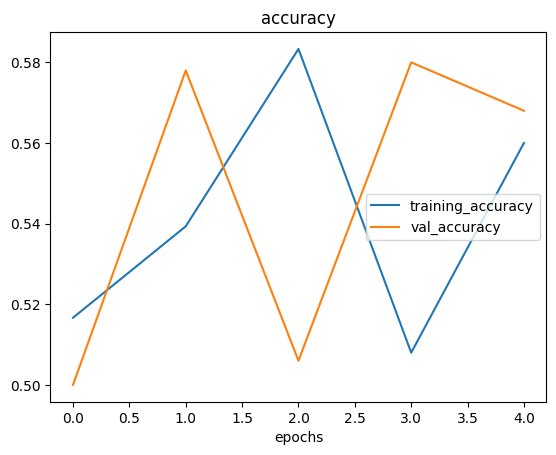

In [55]:
# Check our model training curves
plot_loss_curves(history_6)

Let's shuffle our augmented data and train another model (the same as before) on it and see what happens.


In [56]:
# Import data and augment it and shuffle  from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                         target_size=(224, 224),
                                                                         class_mode="binary",
                                                                         batch_size=32,
                                                                         shuffle=True)  # shuffle data this time

Found 1500 images belonging to 2 classes.


In [57]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,  # we are fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 75s 2s/step - loss: 0.6714 - accuracy: 0.5853 - val_loss: 0.5458 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 73s 2s/step - loss: 0.5712 - accuracy: 0.7047 - val_loss: 0.4203 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 71s 2s/step - loss: 0.5171 - accuracy: 0.7433 - val_loss: 0.3907 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 75s 2s/step - loss: 0.5123 - accuracy: 0.7527 - val_loss: 0.3986 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 73s 2s/step - loss: 0.4933 - accuracy: 0.7713 - val_loss: 0.3512 - val_accuracy: 0.8400


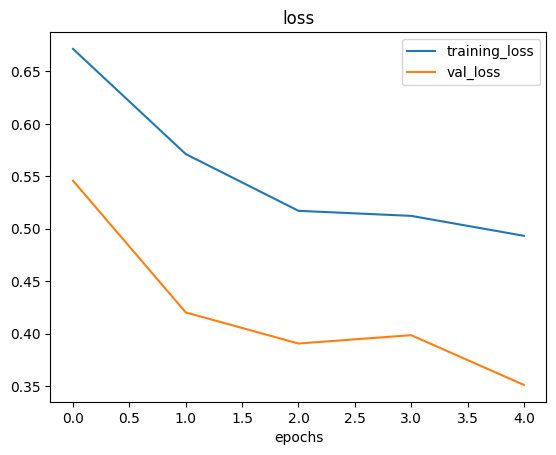

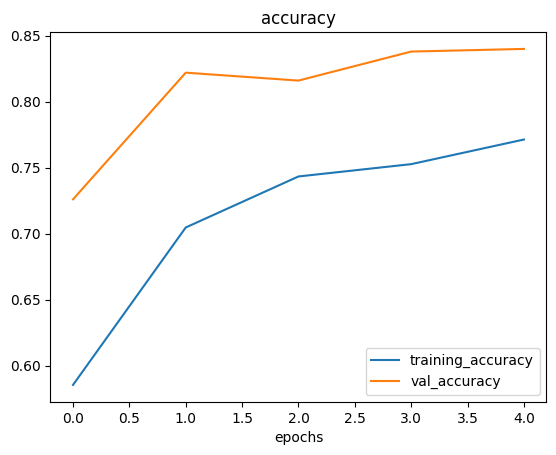

In [58]:
# PLot loss curves
plot_loss_curves(history_7)

> 🔑 **Note:** When shuffling training data, the modelmgets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza and steak at the same time instead of just pizza then steak).


## 7. Repeat until satisfied

Since we have already our baseline, there are a few things we couldtry to continue to improve our model:

* Increasethe number of model layers (e.g. add more `Conv2D/MaxPool2D` layers)
* Increasethe number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideallearning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learnt and adjust it for our own use case


> 🛠 **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how  it performs on the augmented shuffled training data.



## Making a prediction with our trained model on our own custom data


In [59]:
# Classe we are working with
print(class_names)

['pizza' 'steak']


--2024-05-30 20:08:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2024-05-30 20:08:40 (27.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



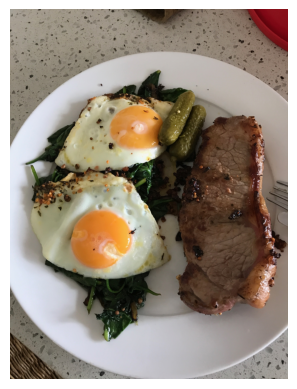

In [60]:
# View an example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [61]:
# Cheak the shape of our image
steak.shape

(4032, 3024, 3)

> 🔑 **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the  data your model was trained on.

In [62]:
# Create a function to import an image and resize it to be able tobe used with a model.
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape it to (img_shape, img_shape, color_channels).
  """

In [63]:
  # Define the filename variable
  filename = "/content/03-steak.jpeg"
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[224, 224])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  print(img)

tf.Tensor(
[[[0.6377451  0.6220588  0.57892156]
  [0.6504902  0.63186276 0.5897059 ]
  [0.63186276 0.60833335 0.5612745 ]
  ...
  [0.52156866 0.05098039 0.09019608]
  [0.49509802 0.04215686 0.07058824]
  [0.52843136 0.07745098 0.10490196]]

 [[0.6617647  0.6460784  0.6107843 ]
  [0.6387255  0.6230392  0.57598037]
  [0.65588236 0.63235295 0.5852941 ]
  ...
  [0.5352941  0.06862745 0.09215686]
  [0.529902   0.05931373 0.09460784]
  [0.5142157  0.05539216 0.08676471]]

 [[0.6519608  0.6362745  0.5892157 ]
  [0.6392157  0.6137255  0.56764704]
  [0.65637255 0.6269608  0.5828431 ]
  ...
  [0.53137255 0.06470589 0.08039216]
  [0.527451   0.06862745 0.1       ]
  [0.52254903 0.05196078 0.0872549 ]]

 ...

 [[0.49313724 0.42745098 0.31029412]
  [0.05441177 0.01911765 0.        ]
  [0.2127451  0.16176471 0.09509804]
  ...
  [0.6132353  0.59362745 0.57009804]
  [0.65294117 0.6333333  0.6098039 ]
  [0.64166665 0.62990195 0.59460783]]

 [[0.65392154 0.5715686  0.45      ]
  [0.6367647  0.54656863 0

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?
